<a href="https://colab.research.google.com/github/nuralfir/Web-Scraping/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library yang digunakan untuk scraping:
*   `requests` = membuat HTTP request di python
*   `BeautifulSoup` = menarik informasi dan data HTML & XML pada website
*   `Pandas` = analisis dan manipulasi data





In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Membuat user-agent agar tidak di-block oleh web server dan membuat request

In [2]:
url = "https://www.tokopedia.com/asus/product"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
r = requests.get(url, headers=headers) #request HTTP ke web server

Inspect element pada website, cari `div` yang memuat link setiap produk yang nantinya akan ditarik datanya

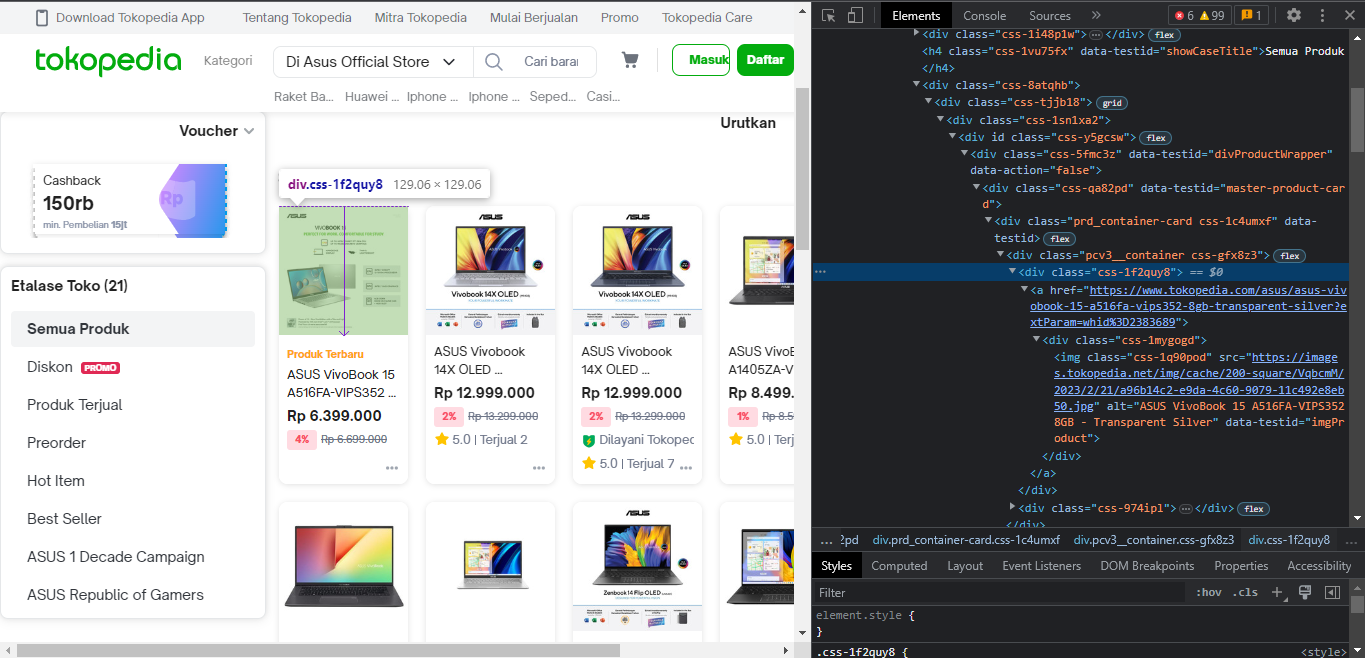

Scrape informasi pada halaman (produk dengan harga dan rating) di web menggunakan library BeautifulSoup

In [ ]:
soup=BeautifulSoup(r.content,'html.parser')
print(soup.prettify()) #menampilkan hasil scrape data dalam format indentasi (lebih rapi)

Ekstrak elemen data produk yang terletak pada tag `div` dan `class` yang sesuai

In [4]:
productlist = soup.find_all("div",{"class":"css-974ipl"})

Ekstrak link setiap produk yang ada pada list `productlist`

In [5]:
productlinks = []
for product in productlist:
    link = product.find("a",{"class":"pcv3__info-content css-gwkf0u"}).get('href')
    productlinks.append(link)

productlinks

['https://www.tokopedia.com/asus/asus-rog-zephyrus-g15-ga503rw-r97rg7g-o-eclipse-gray?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-zenbook-s-13-oled-um5302ta-oleds7110-refined-white?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-16x-m1603qa-vips755-transparent-silver?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-s-14-flip-tn3402qa-vips752-cool-silver?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-s-14-flip-tn3402qa-vips751-quiet-blue?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-14x-m1403qa-vips752-transparent-silver?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-proart-studiobook-16-h7600zm-oledp711-mineral-black?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-pro-14x-oled-n7401ze-oleds715-0-black?extParam=whid%3D2383689',
 'https://www.tokopedia.com/asus/asus-vivobook-pro-14x-oled-n7401ze-oleds714-cool-silver?extParam=w

Ekstrak setiap link untuk mendapatkan nama produk, deskripsi produk, harga produk dan rating produk

In [6]:
c = 0
data = []
for link in productlinks:
    f = requests.get(link,headers=headers).text
    prod=BeautifulSoup(f,'html.parser')

    try:
        name=prod.find("h1",{"class":"css-1os9jjn"}).text.replace('\n',"")
    except:
        name = None

    try:
        desc=prod.find("div",{"data-testid":"lblPDPDescriptionProduk"}).text.replace('\n',"")
    except:
        desc = None

    try:
        price=prod.find("div",{"class":"price"}).text.replace('\n',"")
    except:
        price = None

    asus = {"name":name,"desc":desc,"price":price}

    data.append(asus)
    c=c+1
    print("completed",c)

data

completed 1
completed 2
completed 3
completed 4
completed 5
completed 6
completed 7
completed 8
completed 9
completed 10


[{'name': 'ASUS ROG Zephyrus G15 GA503RW-R97RG7G-O - Eclipse Gray',
  'desc': 'ASUS ROG Zephyrus G15 GA503RW-R97RG7G-O - Eclipse Gray [AMD Ryzen™ 9 6900HS / NVIDIA® GeForce RTX™ 3070Ti / 16GB / 1TB / 15.6inch / WIN11 / OHS]Processor : AMD Ryzen™ 9 6900HS Mobile Processor (8-core/16-thread, 16MB cache, up to 4.9 GHz max boost)Display : 15,6-inci QHD (2560 x 1440) 16:9 anti-glare display DCI-P3: 100%Pantone Validated Refresh Rate: 165HzMemory : 16GB DDR5 on board, 1x DDR5 SO-DIMM slots, MAX 48GBStorage : 1TB M.2 NVMe™ PCIe® 4.0 SSDGraphics : NVIDIA® GeForce RTX™ 3070Ti, 8GB GDDR6, ROG Boost: 1085MHz* at 120W (1035MHz Boost Clock+50MHz OC, 100W+20W Dynamic Boost)Keyboard : Backlit Chiclet KeyboardCamera : 720P HD IR Camera for Windows HelloWireless : Wi-Fi 6E(802.11ax)+Bluetooth 5.2 (Dual band) 2*2Connectivity : 1x RJ45 LAN port, 2x USB 3.2 Gen 2 Type-A, 2x USB 3.2 Gen 2 Type-C support DisplayPort™ / power delivery, 1x card reader (microSD) (UHS-II), 1x 3.5mm Combo Audio JackBattery : 90W

Ubah variabel `data` menjadi DataFrame

In [7]:
df = pd.DataFrame(data)
df

,name,desc,price
0,ASUS ROG Zephyrus G15 GA503RW-R97RG7G-O - Ecli...,ASUS ROG Zephyrus G15 GA503RW-R97RG7G-O - Ecli...,Rp37.999.000
1,ASUS Zenbook S 13 OLED UM5302TA-OLEDS7110 - Re...,ASUS Zenbook S 13 OLED UM5302TA-OLEDS7110 - Re...,Rp19.999.000
2,ASUS Vivobook 16X M1603QA-VIPS755 - Transparen...,ASUS Vivobook 16X M1603QA-VIPS755 - Transparen...,Rp10.499.000
3,ASUS VivoBook S 14 Flip TN3402QA-VIPS752 - Coo...,ASUS VivoBook S 14 Flip TN3402QA-VIPS752 - Coo...,Rp12.499.000
4,ASUS VivoBook S 14 Flip TN3402QA-VIPS751 - Qui...,ASUS VivoBook S 14 Flip TN3402QA-VIPS751 - Qui...,Rp12.499.000
5,ASUS VivoBook 14X M1403QA-VIPS752 - Transparen...,ASUS VivoBook 14X M1403QA-VIPS752 - Transparen...,Rp10.499.000
6,ASUS ProArt Studiobook 16 H7600ZM-OLEDP711 - M...,ASUS ProArt Studiobook 16 H7600ZM-OLEDP711 - M...,Rp39.999.000
7,ASUS VivoBook Pro 14X OLED N7401ZE-OLEDS715 - ...,ASUS VivoBook Pro 14X OLED N7401ZE-OLEDS715 - ...,Rp22.499.000
8,ASUS VivoBook Pro 14X OLED N7401ZE-OLEDS714 - ...,ASUS VivoBook Pro 14X OLED N7401ZE-OLEDS714 - ...,Rp22.499.000
9,ASUS Vivobook 15 A1502ZA-VIPS754 - Quiet Blue,ASUS Vivobook 15 A1502ZA-VIPS754 - Quiet Blue ...,Rp13.799.000
